# Lab13: Stock price prediction
### Réalisé par: Reda Hamouche Mohamed
### EMSI 2024/2025
### Réf: https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233
### Understanding LSTM Networks click <a href="https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21">here</a>
# T.A.F
1. Démarrer 
2. Analyser
3. Améliorer


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

# Step 1: Dataset
 url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [9]:
url = 'dataset/train_dataset.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values
print(dataset_train)
# Data transformation
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

            Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  3423509          7999.55  
...

# Step 2: Model

In [10]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

c:\Users\dell\Desktop\trading\achraf_trd\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Step 3: train

In [11]:
model.fit(X_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 0.0273
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0032
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0027
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0031
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0025
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0032
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0021
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0021
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0022
Epoch 10/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0020
Epoch 11/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0018
Epoch 12/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0021
Epoch 13/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0016
Epoch 14/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0018
Epoch 15/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0017
Epoc

# Step 4: test
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


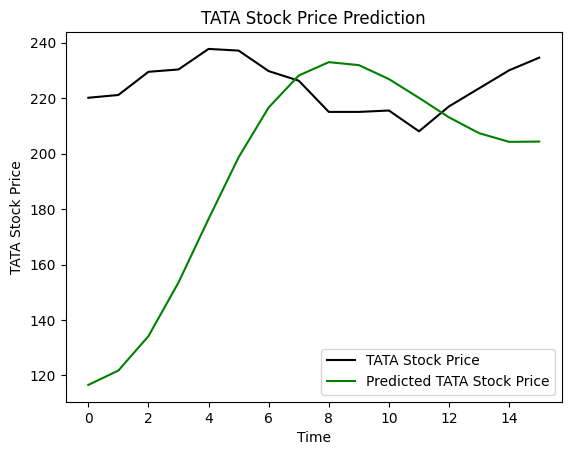

In [ ]:
url = 'dataset/test_dataset.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Prediction
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

#  save the model

In [15]:
model.save('tata_model.h5')